<a href="https://colab.research.google.com/github/nicha0524/DPDM2021/blob/main/Classification_(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-learn คือ package ที่รวบรวมอัลกอริทึม ที่เกี่ยวข้องกับ machine learning และ data mining (sklearn)

# Load Data

In [2]:
from sklearn import datasets

iris_data = datasets.load_iris() #โหลด data 'iris ใน sklearn .ใช้คำสั่ง datasets.load_iris()

In [3]:
iris_data #ข้อมูลความยาว ความกว้างของ กลีบดอก กลีบเลี้ยง ของดอกไอลิส

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
X = iris_data['data']
Y = iris_data['target'] # target สายพันธุ์ของไอลิส

# Train Model

## import

In [5]:
from sklearn.tree import DecisionTreeClassifier # import คำสั่งเพื่อใช้สร้างต้นไม้

## define

In [6]:
mytree = DecisionTreeClassifier()  

## train

In [7]:
mytree.fit(X,Y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## plot tree

In [8]:
from sklearn.tree import plot_tree

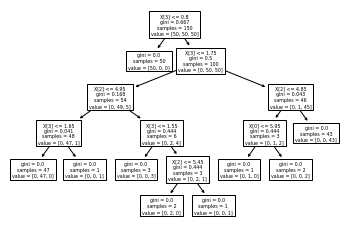

In [9]:
plot_tree(mytree); # สร้างแผนภาพต้นไม้

In [10]:
import numpy as np

In [11]:
np.random.seed(6)
np.random.choice(['kie','oil','nicha'])

'nicha'

# Evaluation

# advance tree

In [12]:
from sklearn import datasets


### หา data จาก: https://scikit-learn.org/stable/datasets/toy_dataset.html

In [13]:
mnist_data = datasets.load_digits() #ข้อมูล Optical recognition of handwritten digits dataset

In [14]:
mnist_data 

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [15]:
x =mnist_data['data'] 
x.shape    # ดูจำนวนข้อมูล

(1797, 64)

In [16]:
x[0,:]  # ดูข้อมูลแถวแรก

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [17]:
np.max(x) # ดูค่าสี 16 คือสีดำสีที่เข้มที่สุด 0 คือสีขาว

16.0

In [18]:
Y = mnist_data['target']
Y.shape 

(1797,)

## แบ่ง test เอาไว้วัดผลอย่างเดียว

In [19]:
from sklearn.model_selection import train_test_split

##### วิธีแบ่ง train และ test จาก: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

###### X_train คือข้อมูลสำหรับการสอนโมเดล และ y_train เพื่อให้โมเดลเปรียบเทียบว่าต่างจากผลที่คำนวณแค่ไหน

In [20]:
X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size=0.50, random_state=6)

In [21]:
X_train[:5,:6]

array([[ 0.,  0.,  8., 15.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.,  0.],
       [ 0.,  1., 12., 16., 16., 16.,  4.],
       [ 0.,  0., 12., 14.,  6.,  0.,  0.],
       [ 0.,  0.,  1.,  8.,  8.,  9., 12.]])

## เริ่มสร้าง model 


    max_depth : กำหนดจำนวนชั้นของต้นไม้
    min_ samples_split : จำนวนตัวอย่างขั้นต่ำที่จำเป็นในหารแยกโหนด
    min_ samples_leaf : จำนวน observations ขั้นต่ำที่อยู่ใน leaf node
    min_weight_fraction_leaf : ถ่วงน้ำหนักว่าให้ความสำคัญกับอันไหนมากกว่า
    max_features : สามารถสุ่มหยิบ feature ไปได้มากที่สุดกี่ % 
    random_state : ค่า seed ที่กำหนดการ random กลุ่มข้อมูล จะเป็นเลขจำนวนเต็ม ถ้ากำหนดเลขเดิม ผลก็เหมือนเดิม
    max_leaf_nodes : เป็นการกำหนกว่ามีใบครบกี่ใบแล้วจะหยุดการเจริญเติบโต
    min_impurity_decrease : ถ้าข้อมูลยังมีสัดส่วนเท่าเดิมก็จะตัดให้หยุดโต เพราะโตไปมากกว่านี้ก็มีสัดส่วนเท่าเดิม


1. ใช้ Entropy มี ความสูงไม่เกิน 4 ชั้น (Oil)
2. ใช้ Gini และ leaf node ต้องมีจำนวน data ไม่น้อยกว่า 5 (Nicha)
3. ใช้ Entropy และ มี จำนวน leaf node ไม่เกิน 15 (Kie)

### หา validation set
 

#####ข้อมูลที่ใช้ในการตรวจสอบความแม่นยำของโมเดล ระหว่างการ Train แบ่งข้อมูลเป็น X_train, y_train

In [27]:
X_traintrain, X_val, y_traintrain, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6) # กำหนดส่วน test 30 %

In [28]:
X_traintrain[:5,:7]

array([[ 0.,  0.,  9., 16., 10.,  2.,  0.],
       [ 0.,  1., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 15.,  1.],
       [ 0.,  0.,  3., 11., 14., 12.,  3.],
       [ 0.,  0.,  5., 12., 16., 15.,  0.]])

####Import

In [22]:
from sklearn.tree import DecisionTreeClassifier # import คำสั่งเพื่อใช้สร้างต้นไม้

####Define

In [38]:
mytree = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5) # ใช้ Gini และ leaf node ต้องมีจำนวน data ไม่น้อยกว่า 5

####Train

In [39]:
mytree.fit(X_traintrain,y_traintrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

####plot tree

In [40]:
from sklearn.tree import plot_tree

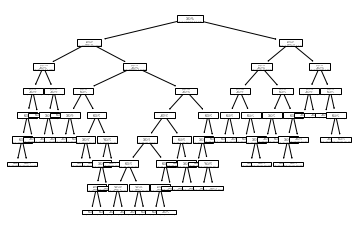

In [41]:
plot_tree(mytree); # สร้างแผนภาพต้นไม้